Plot for report - assignment 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Speedup

In [2]:
# Create a function to plot the speedup graph
def plot_speedup(ax, speedup_data, linear_speedup, x_ticks, y_limit, graph_names, title):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
    for i in range(len(speedup_data)):
        ax.plot(range(1, len(speedup_data[i])+1), speedup_data[i], label=graph_names[i], color=colors[i], marker='o', linestyle='--')

    ax.plot(linear_speedup, linear_speedup, label='Linear Speedup', color='gray', linestyle=':')

    ax.set_xticks(range(1, x_ticks+1))
    ax.set_ylim(0, y_limit)
    ax.grid(alpha=0.2)

    ax.fill_between([x for x in range(0,x_ticks+1)],
                    [x for x in range(0,x_ticks+1)],len(data[0]),
                    alpha=0.1,color="green", label="Superlinear speedup zone")

    ax.fill_between([x for x in range(0,x_ticks+1)],
                    [x for x in range(0,x_ticks+1)],
                    alpha=0.1,color="red",label="Sublinear speedup zone")

    ax.set_xlabel('Number of threads')
    ax.set_ylabel('Speedup')
    ax.set_title(title)

Algorithm by edges

In [3]:
# Load and read each CSV file and compute the minimum of each row
graph_names_edge = ['1000_95', '1005_email', '4039_fb', '5000_50', '10000_05', '36692_enron', '58228_bright', '70000_00005']
data = []
for file in graph_names_edge:
    df = pd.read_csv(f'./execution_times/results_{file}.csv', header=None)
    df_min = df.min(axis=1) # Get the minimum running time for each row
    data.append(df_min)

df_concat = pd.concat(data, axis=1, keys=graph_names_edge)
df_concat.index.name = 'NumThreads'

print(df_concat)

            1000_95  1005_email  4039_fb   5000_50  10000_05  36692_enron  \
NumThreads                                                                  
0           12275.0       264.0   5064.0  946593.0  355918.0     101705.0   
1            6183.0       134.0   2565.0  472796.0  178509.0      52038.0   
2            5526.0       116.0   2312.0  385041.0  159547.0      47114.0   
3            5071.0       107.0   2135.0  327429.0  145583.0      43606.0   
4            5212.0       108.0   2143.0  328028.0  146153.0      44188.0   
5            5104.0       108.0   2212.0  328505.0  146401.0      44953.0   
6            5155.0       106.0   2267.0  328829.0  146727.0      44785.0   
7            5114.0       106.0   2210.0  329028.0  146728.0      44636.0   
8            5127.0       109.0   2195.0  329549.0  146875.0      44821.0   
9            5106.0       108.0   2185.0  329350.0  146778.0      43523.0   
10           5162.0       108.0   2176.0  329462.0  147559.0      43561.0   

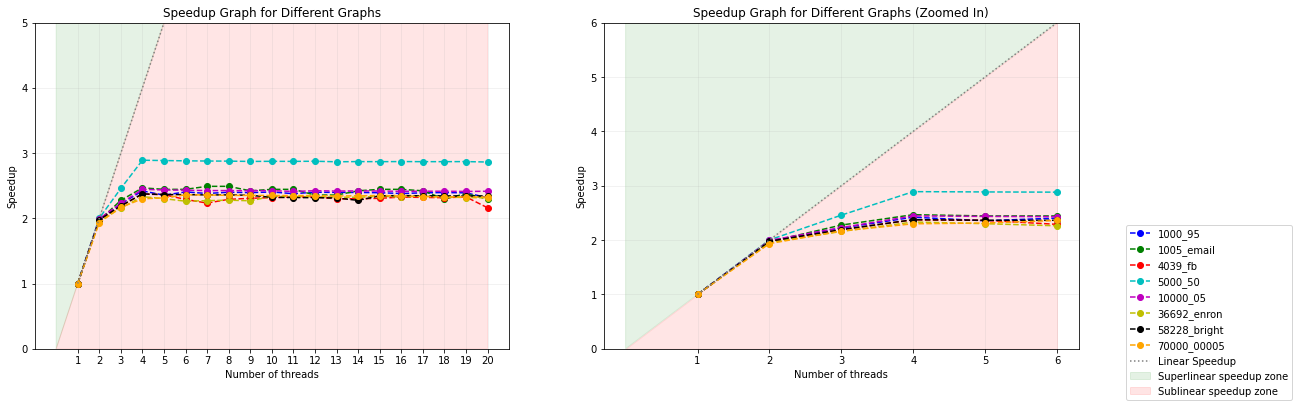

In [4]:
# Compute the speedup
speedup_data = []
for i in range(len(data)):
    speedup = [data[i][0] / t for t in data[i]]
    speedup_data.append(speedup)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

linear_speedup = [t for t in range(1, len(data[0])+1)]

# Plot the speedup graph for x-axis from 1 to 20
plot_speedup(ax1, speedup_data, linear_speedup, 20, 5, graph_names_edge, 'Speedup Graph for Different Graphs')

# Plot the speedup graph for x-axis from 1 to 6
plot_speedup(ax2, [speedup_data[i][:6] for i in range(len(speedup_data))], linear_speedup[:6], 6, 6, graph_names_edge, 'Speedup Graph for Different Graphs (Zoomed In)')

handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(*ax1.get_legend_handles_labels(), loc='lower right')
plt.subplots_adjust(right=0.85)

plt.show()

Algorithm by nodes

In [5]:
# Load and read each CSV file and compute the minimum of each row
graph_names_nodes = ['node_1000_95', 'node_1005_email', 'node_4039_fb', 'node_36692_enron', 'node_58228_bright', 'node_70000_00005']
data_nodes = []
for file in graph_names_nodes:
    df = pd.read_csv(f'./execution_times/results_{file}.csv', header=None)
    df_min = df.min(axis=1) # Get the minimum running time for each row
    data_nodes.append(df_min)

df_concat_nodes = pd.concat(data_nodes, axis=1, keys=graph_names_nodes)
df_concat_nodes.index.name = 'NumThreads'

print(df_concat_nodes)

            node_1000_95  node_1005_email  node_4039_fb  node_36692_enron  \
NumThreads                                                                  
0                 5665.0            213.0        3687.0          112356.0   
1                 3012.0            114.0        1943.0           59278.0   
2                 2613.0             98.0        1738.0           53103.0   
3                 2319.0             93.0        1582.0           48439.0   
4                 2323.0             89.0        1591.0           49577.0   
5                 2327.0             91.0        1590.0           49563.0   
6                 2330.0             93.0        1656.0           49467.0   
7                 2333.0             88.0        1603.0           48382.0   
8                 2331.0             89.0        1625.0           48496.0   
9                 2332.0             94.0        1593.0           48334.0   
10                2335.0             90.0        1625.0           48433.0   

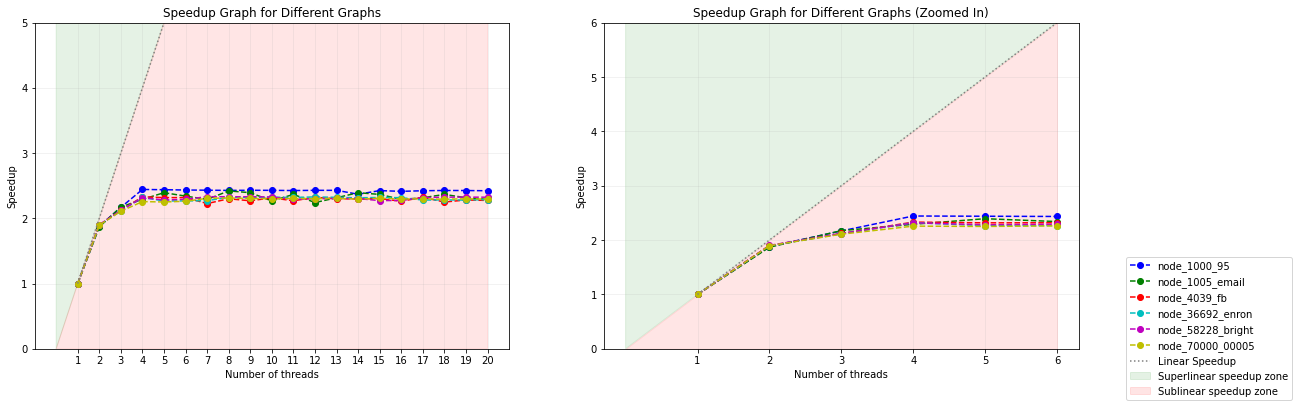

In [6]:
# Compute the speedup
speedup_data_nodes = []
for i in range(len(data_nodes)):
    speedup = [data_nodes[i][0] / t for t in data_nodes[i]]
    speedup_data_nodes.append(speedup)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

linear_speedup_nodes = [t for t in range(1, len(data_nodes[0])+1)]

# Plot the speedup graph for x-axis from 1 to 20
plot_speedup(ax1, speedup_data_nodes, linear_speedup_nodes, 20, 5, graph_names_nodes, 'Speedup Graph for Different Graphs')

# Plot the speedup graph for x-axis from 1 to 6
plot_speedup(ax2, [speedup_data_nodes[i][:6] for i in range(len(speedup_data_nodes))], linear_speedup_nodes[:6], 6, 6, graph_names_nodes, 'Speedup Graph for Different Graphs (Zoomed In)')

handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(*ax1.get_legend_handles_labels(), loc='lower right')
plt.subplots_adjust(right=0.85)

plt.show()

Comparison Execution times

In [7]:
# Create a function to plot the execution speeds of the algorithm on different graphs
def plot_exetime(ax, exetimes, x_ticks, graph_names, title):
    colors = ['orange', 'r', 'c', 'm', 'y', 'k']
    for i in range(exetimes.shape[1]):
        ax.plot(range(1, exetimes.shape[0]+1), exetimes.iloc[:,i], label=graph_names[i], color=colors[i], marker='o', linestyle='--')

    ax.set_xticks(range(1, x_ticks+1))
    ax.grid(alpha=0.2)

    ax.set_xlabel('Number of threads')
    ax.set_ylabel('Execution time [ms]')
    ax.set_title(title)

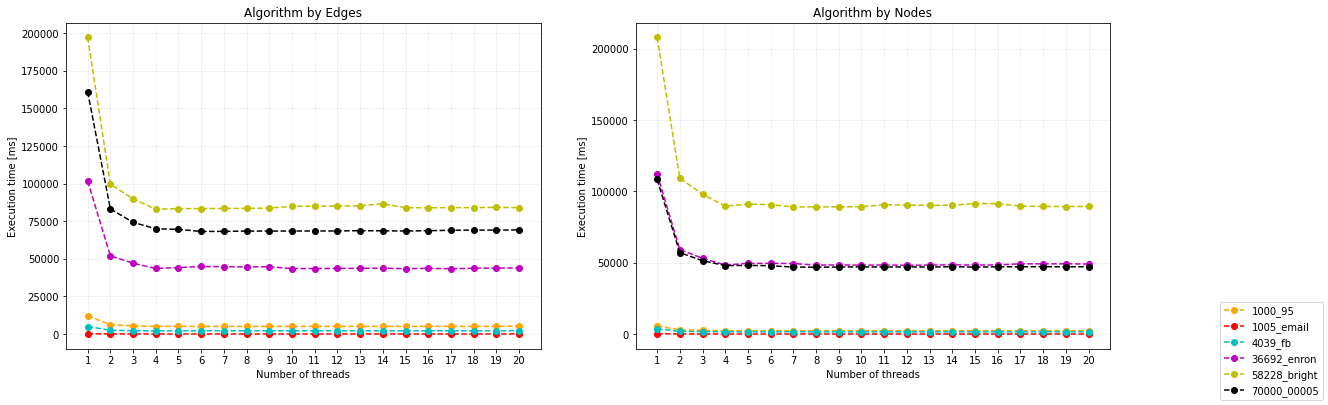

In [9]:
graph_names_exetime = ['1000_95', '1005_email', '4039_fb', '36692_enron', '58228_bright', '70000_00005']
df_concat_edges = df_concat.drop('5000_50', axis=1)
df_concat_edges = df_concat_edges.drop('10000_05', axis=1)
# df_concat_edges = df_concat_edges.drop('70000_00005', axis=1) #temporary

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plot_exetime(ax1, df_concat_edges, 20, graph_names_exetime, 'Algorithm by Edges')
plot_exetime(ax2, df_concat_nodes, 20, graph_names_exetime, 'Algorithm by Nodes')

handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(*ax1.get_legend_handles_labels(), loc='lower right')
plt.subplots_adjust(right=0.85)
plt.show()

In [10]:
# Create a function to plot the execution speeds of the algorithm on different graphs
def plot_exetime_oat(ax, exetime_nodes, exetime_edges, x_ticks, title):
    ax.plot(range(1, len(exetime_nodes)+1), exetime_nodes, label="by nodes", color='orange', marker='o', linestyle='--')
    ax.plot(range(1, len(exetime_edges)+1), exetime_edges, label="by edges", color='c', marker='o', linestyle='--')

    ax.set_xticks(range(1, x_ticks+1))
    ax.grid(alpha=0.2)

    # ax.set_xlabel('Number of threads')
    ax.set_ylabel('Execution time [ms]')
    ax.set_title(title)

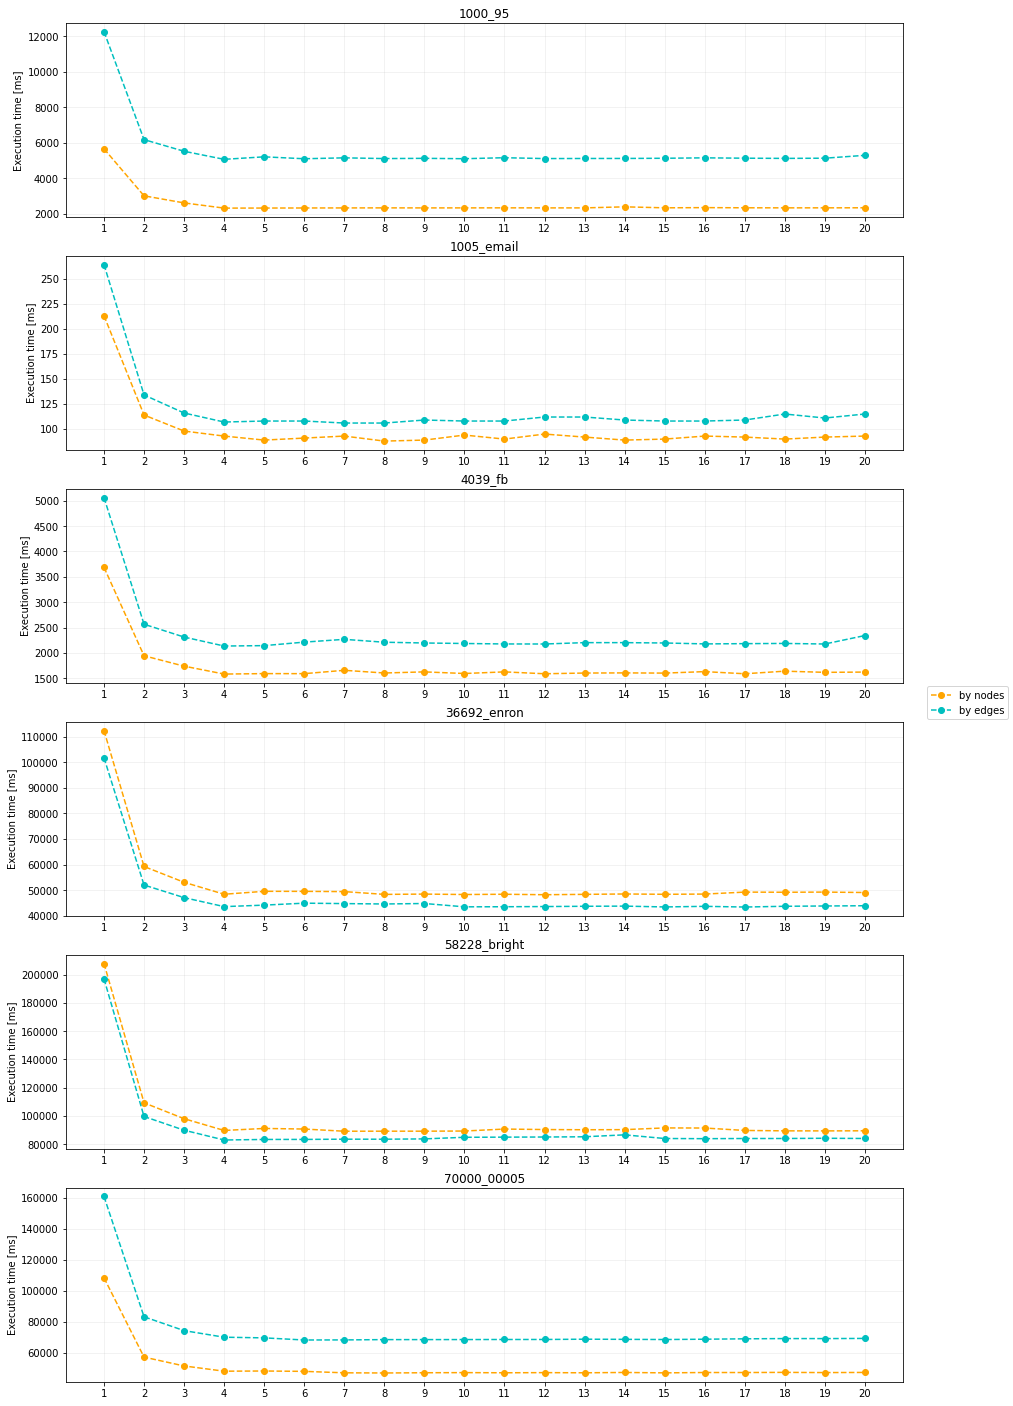

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(15, 25))
plots = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(plots)):
    plot_exetime_oat(plots[i], df_concat_nodes.iloc[:,i], df_concat_edges.iloc[:,i], 20, graph_names_exetime[i])

handles, labels = [], []
for ax in plots:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(*ax1.get_legend_handles_labels(), loc='right')
plt.show()